# BIOMAG introduction material 1. - Python basics

In this material, we are going to cover most of the basic functionalities that you should know related to python programming. a basic knowledge of python is assumed.

First, we import the necessary packages

In [1]:
# numpy - a package for fast vectorized
import numpy as np

# matplotlib - a package for visualization
import matplotlib.pyplot as plt

# image reading from scikit-image
from skimage.io import imread

# glob - useful for iterating through directories
from glob import glob

# tqdm - a useful progress bar tool
from tqdm.notebook import tqdm

### Processing files

The glob package is a very useful tool for iterating through files and directories. With the help of glob we can use unix wildcard expressions too.([glob](https://en.wikipedia.org/wiki/Glob_(programming))). \
Let's try it with the test folder:

In [2]:
image_paths = glob('test_folder/*.png')
print(image_paths)

['test_folder/001_1024_1024.png', 'test_folder/001_2048_5120.png', 'test_folder/001_5120_7168.png', 'test_folder/002_3072_2048.png', 'test_folder/004_1024_4096.png', 'test_folder/005_5120_4096.png', 'test_folder/007_1024_1024.png', 'test_folder/008_5120_2048.png', 'test_folder/010_3072_6144.png', 'test_folder/011_4096_6144.png']


In [3]:
powers = [0,1,2,3,4]
two_powers = [2**i for i in powers]
print(two_powers)

[1, 2, 4, 8, 16]


Now we can iterate through this list of images and do some visualization/data printing:

001_1024_1024.png
(1024, 1024, 3)


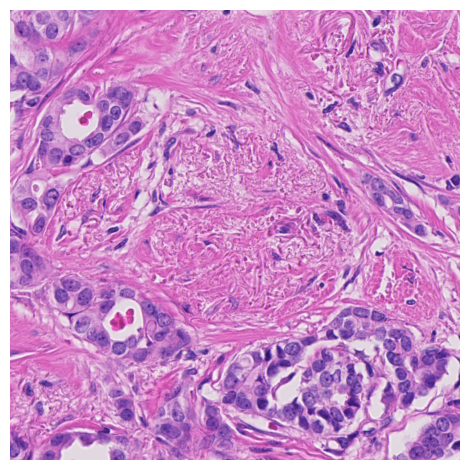

001_2048_5120.png
(1024, 1024, 3)


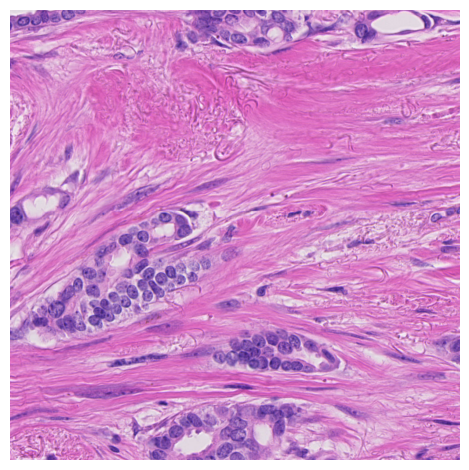

001_5120_7168.png
(1024, 1024, 3)


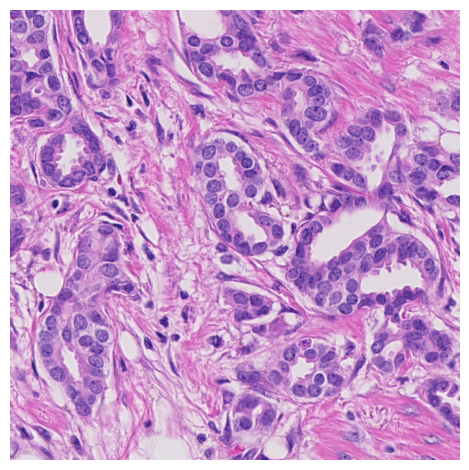

In [4]:
for image_path in image_paths[:3]: # just iterate through the first 3 images
    img = imread(image_path)
    print(image_path.split('/')[-1]) # print the file name
    print(img.shape) # print the image dimensions
    plt.imshow(img) # plot the image...
    plt.axis('off') # ... without x, y axis labels
    plt.tight_layout()
    plt.show()

Now let us access individual channels/pixels on the image and modify them.

If we have lots of data and we want to see where the data processing is currently at, we can use the tqdm functionality to display a progress bar:

In [9]:
for image_path in tqdm(image_paths):
    img = imread(image_path)
    img[8,18,0] += 3 # add 3 to the pixel value at (9,19) in the red channel.

  0%|          | 0/10 [00:00<?, ?it/s]

### Image reading made easier

We don't necessarily have to read images individually with for loops, we can automate it with the *map* function:

In [22]:
image_list = list(map(imread, image_paths))
plt.imshow(image_list[0])
plt.show()

TypeError: 'map' object is not subscriptable

For smaller datasets it might be more suitable to use a list comprehension:

In [ ]:
image_list = [imread(x) for x in image_paths]
plt.imshow(image_list[0])
plt.show()

### Homework

All of the tasks have to be done on the files located in the homework folder. Each task has to be done **on tiff images only which have a resolution of 1024 x 1024**.
1. Use tqdm to iterate through the images which satisfy the above conditions.
2. Convert the images to grayscale in a way that you take the average of all of the channels. Do not use opencv for this, just numpy operations.
3. On these grayscale images, a) Determine a threshold value which (more or less) captures the cell nuclei. b) do some post-processing steps so that very small artifacts get eliminated. c) convert the binary mask into a labeled mask (each individual object has a different intensity value starting from 1: you can use skimage for this).
4. for every image, print out the number of nuclei on the image, and in the end, print out the average number of nuclei.